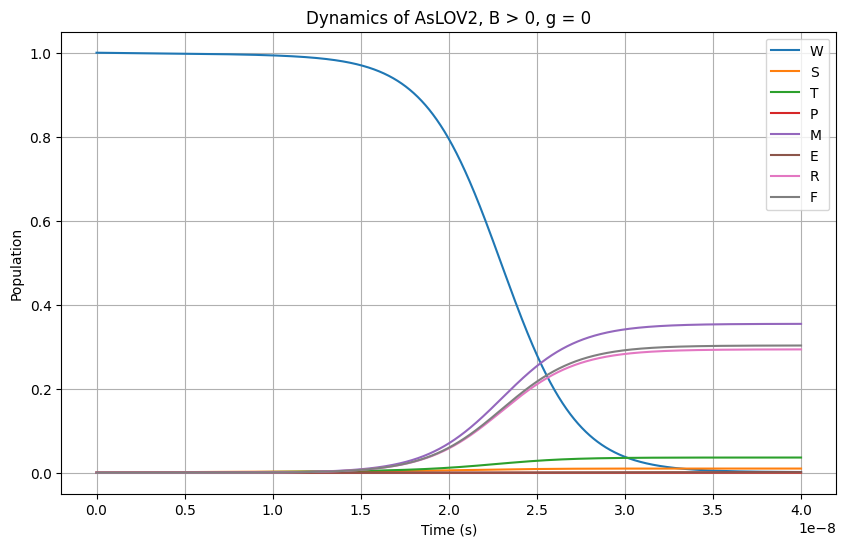

C:\Users\stepo\AppData\Local\Temp\ipykernel_12712\320392253.py:76: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  v_t = cumtrapz(dv_dt, times, initial=0)


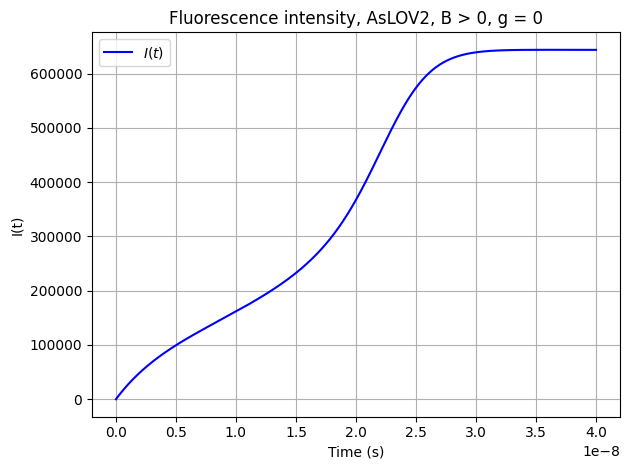

In [36]:
import numpy as np
from scipy.integrate import solve_ivp, cumtrapz
import matplotlib.pyplot as plt

# Параметры (настраиваемые)
f = 2000000  # Частота (примерное значение, можно менять)
g = 0 #1000000 # g-фактор
B = 2.0e-2  # Магнитное поле (примерное значение)

# Матрица коэффициентов
A = np.array([
    [-0.23 * f, 6.5e7, 0, 0, 0, 0, 0, 0],
    [0.23 * f, -1.2e9, 1.3e8, 1.7e11, 0, 0, 0, 0],
    [0, 1.3e8, -1e7, 0, 4.5e7, 0, 0, 0],
    [0, 1e9, 0, -1.71e11, 320, 0, 0, 6.6e6],
    [0, 0, 1e7, 1e9, -7e8-1e3 * g / (2 * B), 1e3 * g / (2 * B), 7*B*1e10, 6.6e6],
    [0, 0, 0, 0, 1e3 * g / (2 * B), -7*B*1e10 + 2.3e8, 0, 6.6e6 * np.exp(-2 * B * 1e-23)],
    [0, 0, 0, 0, 7*B*1e10, 0, -1.23e9, 6.6e6 * np.exp(2 * B * 1e-23)],
    [0, 0, 0, 2.3e8, 2.3e8, 2.3e8 * np.exp(2 * B * 1e-23), 2.3e8 * np.exp(-2 * B * 1e-23), -26.4e6],
])

# Начальные условия (пример: все нули, кроме первого состояния)
y0 = np.zeros(8)
y0[0] = 1.0  # Например, W находится в начальном состоянии

# Диапазон времени
t_span = (0, 0.4e-7)  # От 0 до 10 наносекунд
t_eval = np.linspace(*t_span, 10000)  # 1000 точек для отрисовки

# Уравнение системы с нормализацией
def system_with_normalization(t, y):
    dydt = A @ y
    return dydt

# Коллбэк для нормализации
def normalize(y):
    total = np.sum(y)
    if total > 0:
        return y / total
    return y

# Пользовательская функция для интеграции с нормализацией
def solve_with_normalization(system, t_span, y0, t_eval):
    result = []
    times = []
    current_y = y0
    times.append(t_span[0])
    result.append(current_y)

    for i in range(1, len(t_eval)):
        dt = t_eval[i] - t_eval[i-1]
        sol = solve_ivp(system, (times[-1], t_eval[i]), current_y, method='RK45')
        current_y = sol.y[:, -1]
        current_y = normalize(current_y)
        times.append(t_eval[i])
        result.append(current_y)

    return np.array(times), np.array(result).T

# Решение системы
times, normalized_y = solve_with_normalization(system_with_normalization, t_span, y0, t_eval)
labels = ['W', 'S', 'T', 'P', 'M', 'E', 'R', 'F']
# График
plt.figure(figsize=(10, 6))
for i in range(8):
    plt.plot(times, normalized_y[i], label=labels[i])
plt.xlabel('Time (s)')
plt.ylabel('Population')
plt.title('Dynamics of AsLOV2, B > 0, g = 0')
plt.legend()
plt.grid()
plt.show()


dv_dt = 6.5e7 * normalized_y[1]
v_t = cumtrapz(dv_dt, times, initial=0)

plt.plot(times, dv_dt, label=r'$I(t)$', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('I(t)')
plt.title('Fluorescence intensity, AsLOV2, B > 0, g = 0')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

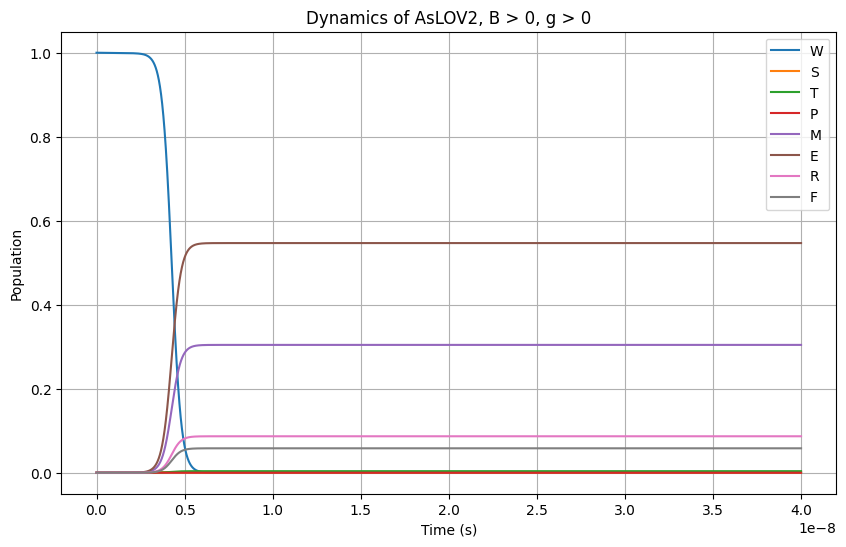

C:\Users\stepo\AppData\Local\Temp\ipykernel_22760\3256846133.py:76: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  v_t = cumtrapz(dv_dt, times, initial=0)


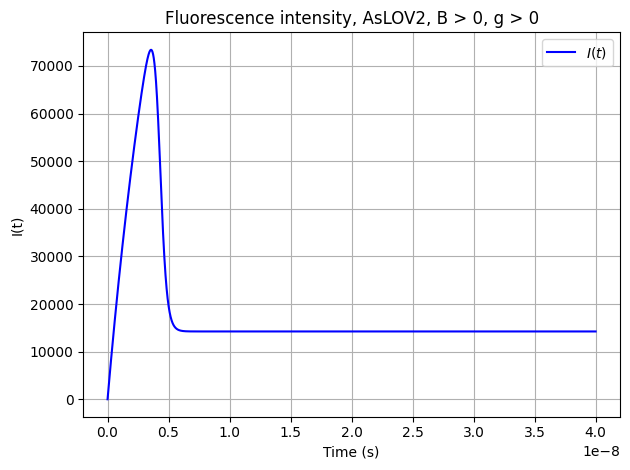

In [5]:
import numpy as np
from scipy.integrate import solve_ivp, cumtrapz
import matplotlib.pyplot as plt

# Параметры (настраиваемые)
f = 2000000 # Частота (примерное значение, можно менять)
g = 200000 # g-фактор
B = 2.0e-2  # Магнитное поле (примерное значение)

# Матрица коэффициентов
A = np.array([
    [-0.23 * f, 6.5e7, 0, 0, 0, 0, 0, 0],
    [0.23 * f, -1.2e9, 1.3e8, 1.7e11, 0, 0, 0, 0],
    [0, 1.3e8, -1e7, 0, 4.5e7, 0, 0, 0],
    [0, 1e9, 0, -1.71e11, 320, 0, 0, 6.6e6],
    [0, 0, 1e7, 1e9, -7e8-1e3 * g / (2 * B), 1e3 * g / (2 * B), 7*B*1e10, 6.6e6],
    [0, 0, 0, 0, 1e3 * g / (2 * B), -7*B*1e10 + 2.3e9, 0, 6.6e6 * np.exp(-2 * B * 1e-23)],
    [0, 0, 0, 0, 7*B*1e10, 0, -1.23e9, 6.6e6 * np.exp(2 * B * 1e-23)],
    [0, 0, 0, 2.3e8, 2.3e8, 2.3e8 * np.exp(2 * B * 1e-23), 2.3e8 * np.exp(-2 * B * 1e-23), -26.4e6],
])

# Начальные условия (пример: все нули, кроме первого состояния)
y0 = np.zeros(8)
y0[0] = 1.0  # Например, W находится в начальном состоянии

# Диапазон времени
t_span = (0, 0.4e-7)  # От 0 до 10 наносекунд
t_eval = np.linspace(*t_span, 10000)  # 1000 точек для отрисовки

# Уравнение системы с нормализацией
def system_with_normalization(t, y):
    dydt = A @ y
    return dydt

# Коллбэк для нормализации
def normalize(y):
    total = np.sum(y)
    if total > 0:
        return y / total
    return y

# Пользовательская функция для интеграции с нормализацией
def solve_with_normalization(system, t_span, y0, t_eval):
    result = []
    times = []
    current_y = y0
    times.append(t_span[0])
    result.append(current_y)

    for i in range(1, len(t_eval)):
        dt = t_eval[i] - t_eval[i-1]
        sol = solve_ivp(system, (times[-1], t_eval[i]), current_y, method='RK45')
        current_y = sol.y[:, -1]
        current_y = normalize(current_y)
        times.append(t_eval[i])
        result.append(current_y)

    return np.array(times), np.array(result).T

# Решение системы
times, normalized_y = solve_with_normalization(system_with_normalization, t_span, y0, t_eval)
labels = ['W', 'S', 'T', 'P', 'M', 'E', 'R', 'F']
# График
plt.figure(figsize=(10, 6))
for i in range(8):
    plt.plot(times, normalized_y[i], label=labels[i])
plt.xlabel('Time (s)')
plt.ylabel('Population')
plt.title('Dynamics of AsLOV2, B > 0, g > 0')
plt.legend()
plt.grid()
plt.show()


dv_dt = 6.5e7 * normalized_y[1]
v_t = cumtrapz(dv_dt, times, initial=0)

plt.plot(times, dv_dt, label=r'$I(t)$', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('I(t)')
plt.title('Fluorescence intensity, AsLOV2, B > 0, g > 0')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [3]:
import numpy as np
from scipy.integrate import solve_ivp, cumtrapz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

# Параметры (константы)
f = 2e6  # Частота

# Определяем матрицу коэффициентов
def get_matrix(g, B):
    return np.array([
        [-0.23 * f, 6.5e7, 0, 0, 0, 0, 0, 0],
        [0.23 * f, -1.2e9, 1.3e8, 1.7e11, 0, 0, 0, 0],
        [0, 1.3e8, -1e7, 0, 4.5e7, 0, 0, 0],
        [0, 1e9, 0, -1.71e11, 320, 0, 0, 6.6e6],
        [0, 0, 1e7, 1e9, -7e8 - 1e3 * g / (2 * B), 1e3 * g / (2 * B), 7 * B * 1e10, 6.6e6],
        [0, 0, 0, 0, 1e3 * g / (2 * B), -7 * B * 1e10 + 2.3e9, 0, 6.6e6 * np.exp(-2 * B * 1e-23)],
        [0, 0, 0, 0, 7 * B * 1e10, 0, -1.23e9, 6.6e6 * np.exp(2 * B * 1e-23)],
        [0, 0, 0, 2.3e8, 2.3e8, 2.3e8 * np.exp(2 * B * 1e-23), 2.3e8 * np.exp(-2 * B * 1e-23), -26.4e6],
    ])

# Начальные условия
y0 = np.zeros(8)
y0[0] = 1.0

# Диапазон времени
t_span = (0, 0.4e-7)
t_eval = np.linspace(*t_span, 1000)

# Нормализация
def normalize(y):
    total = np.sum(y)
    if total > 0:
        return y / total
    return y

# Решение с нормализацией
def solve_with_normalization(A, y0, t_eval):
    result = []
    current_y = y0
    for i in range(1, len(t_eval)):
        dt = t_eval[i] - t_eval[i-1]
        sol = solve_ivp(lambda t, y: A @ y, (t_eval[i-1], t_eval[i]), current_y, method='Radau')
        current_y = normalize(sol.y[:, -1])
        result.append(current_y)

    return np.array(result).T

# Функция вычисления интенсивности
def compute_fluorescence_intensity(g, B):
    if B == 0:  # Избегаем деления на ноль
        B = 1e-10
    A = get_matrix(g, B)
    normalized_y = solve_with_normalization(A, y0, t_eval)
    dv_dt = 6.5e7 * normalized_y[1]
    return dv_dt[-1]  # Возвращаем интенсивность в конце



100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [7:21:34<00:00, 264.95s/it]


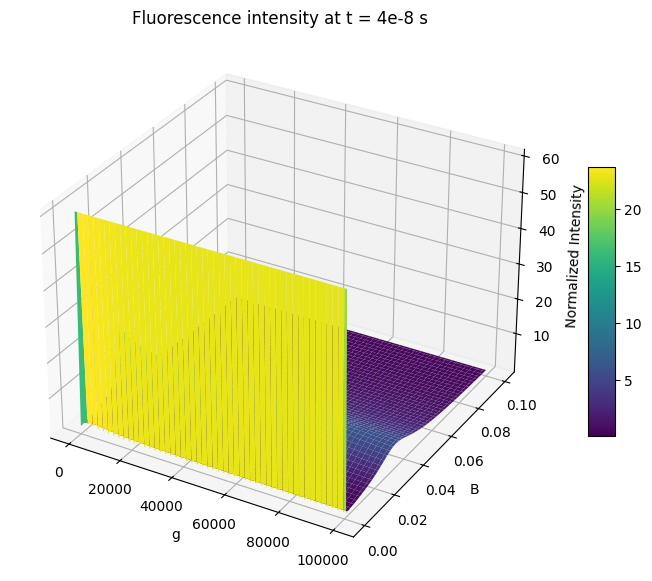

In [26]:
# Создаем сетку значений g и B
g_values = np.linspace(0, 1e5, 100)
B_values = np.linspace(0, 1e-1, 100)
g_grid, B_grid = np.meshgrid(g_values, B_values)

# Вычисляем интенсивности
intensity = np.zeros_like(g_grid)
for i in tqdm(range(g_grid.shape[0])):
    for j in range(g_grid.shape[1]):
        intensity[i, j] = compute_fluorescence_intensity(g_grid[i, j], B_grid[i, j])

# Нормируем по значению в (0, 0)
intensity /= intensity[0, 0]

# Построение 3D-графика
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(g_grid, B_grid, intensity, cmap='viridis', edgecolor='none')
ax.set_title('Fluorescence intensity at t = 4e-8 s')
ax.set_xlabel('g')
ax.set_ylabel('B')
ax.set_zlabel('Normalized Intensity')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.savefig("fluorescence_intensity_plot.png", dpi=300, bbox_inches='tight')
plt.show()

In [30]:
# Проверьте, содержатся ли данные в переменной intensity
print(intensity.shape)
np.savetxt("intensity_data.txt", intensity)


(100, 100)


AttributeError: module 'numpy' has no attribute 'DataFrame'

In [20]:
condition_number = np.linalg.cond(A)
print(f"Condition number: {condition_number:.2e}")
import time
start_time = time.time()
def solve_with_normalization(A, y0, t_eval):
    result = []
    current_y = y0
    for i in range(1, len(t_eval)):
        dt = t_eval[i] - t_eval[i-1]
        sol = solve_ivp(lambda t, y: A @ y, (t_eval[i-1], t_eval[i]), current_y, method='RK45')
        current_y = normalize(sol.y[:, -1])
        result.append(current_y)

    return np.array(result).T



t_span = (0, 0.4e-7)
t_eval2 = np.linspace(*t_span, 10) 
normalized_y = solve_with_normalization(A, y0, t_eval2)
dv_dt = 6.5e7 * normalized_y[1]
print(f"Time for one point: {time.time() - start_time:.2f} seconds")

Condition number: 5.79e+05
Time for one point: 0.36 seconds


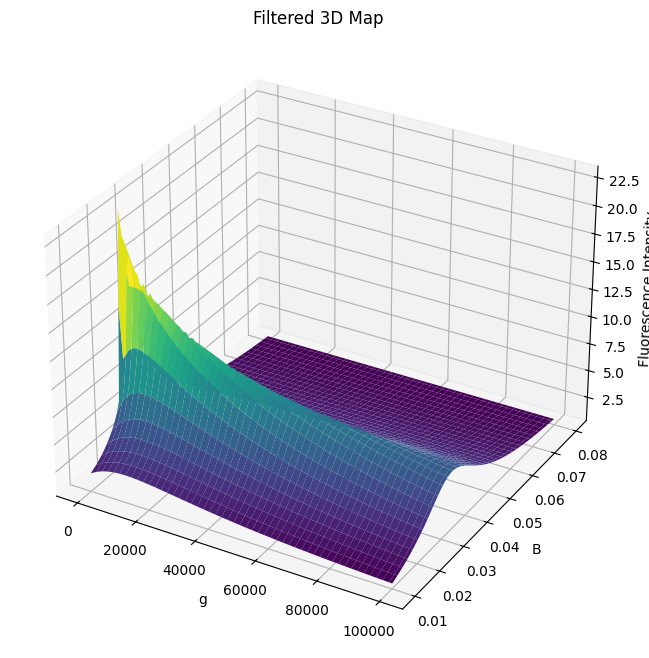

In [18]:
intensity = np.loadtxt("intensity_data.txt")
B_grid = np.linspace(0, 0.1, intensity.shape[0])  # Пример генерации B (если сохранили отдельно, загрузите)
mask = (B_grid >= 0.01) & (B_grid <= 0.08)
filtered_intensity = intensity[mask, :]  # Применяем маску
filtered_B_grid = B_grid[mask]  # Оставляем только соответствующие B
g_grid = np.linspace(0, 1e5, intensity.shape[1])

g_grid = np.linspace(0, 1e5, intensity.shape[1])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Построение графика из отфильтрованных данных
G, B = np.meshgrid(g_grid, filtered_B_grid)
ax.plot_surface(G, B, filtered_intensity, cmap='viridis')

# Настройка осей
ax.set_xlabel('g')
ax.set_ylabel('B')
ax.set_zlabel('Fluorescence Intensity')
plt.title("Filtered 3D Map")
plt.show()


In [24]:
def compute_intensity(g, B):
    if B == 0:  # Избегаем деления на ноль
        B = 1e-10
    A = get_matrix(g, B)
    normalized_y = solve_with_normalization(A, y0, t_eval)
    dv_dt = 6.5e7 * normalized_y[1]
    return dv_dt # Возвращаем интенсивность в конце

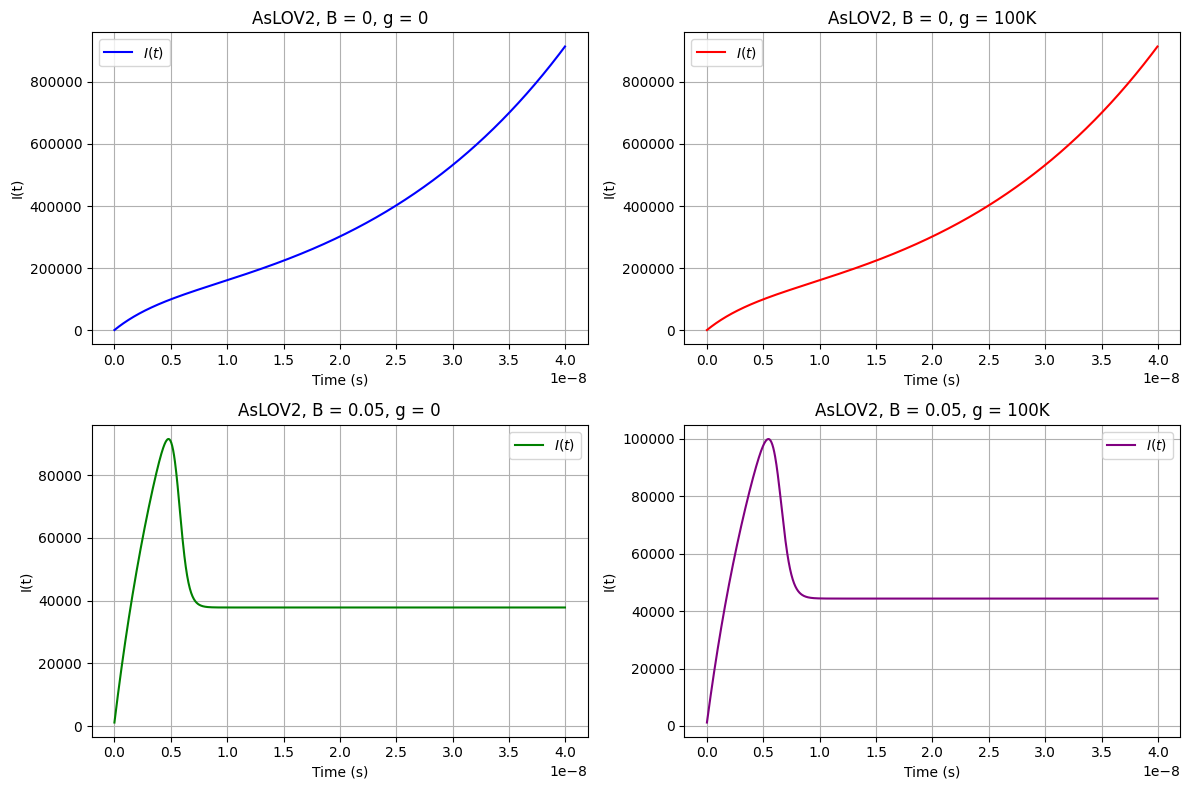

In [32]:
t_span = (0, 0.4e-7)
t_eval = np.linspace(*t_span, 1000)
dv_dt00 = compute_intensity(1, 0)
dv_dt005 = compute_intensity(0.00001, 0.05)
dv_dt_60K0 = compute_intensity(100000, 0.00001)
dv_dt_both = compute_intensity(100000, 0.05)
times = t_eval[:999]

plt.figure(figsize=(12, 8))

# Первый график
plt.subplot(2, 2, 1)
plt.plot(times, dv_dt00, label=r'$I(t)$', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('I(t)')
plt.title('AsLOV2, B = 0, g = 0')
plt.grid()
plt.legend()

# Второй график


# Третий график
plt.subplot(2, 2, 2)
plt.plot(times, dv_dt_60K0, label=r'$I(t)$', color='red')
plt.xlabel('Time (s)')
plt.ylabel('I(t)')
plt.title('AsLOV2, B = 0, g = 100K')
plt.grid()
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(times, dv_dt005, label=r'$I(t)$', color='green')
plt.xlabel('Time (s)')
plt.ylabel('I(t)')
plt.title('AsLOV2, B = 0.05, g = 0')
plt.grid()
plt.legend()

# Четвёртый график
plt.subplot(2, 2, 4)
plt.plot(times, dv_dt_both, label=r'$I(t)$', color='purple')
plt.xlabel('Time (s)')
plt.ylabel('I(t)')
plt.title('AsLOV2, B = 0.05, g = 100K')
plt.grid()
plt.legend()

plt.tight_layout()  # Чтобы избежать наложения графиков
plt.show()


100%|████████████████████████████████████████████████████████████████████████████████| 999/999 [00:01<00:00, 925.77it/s]


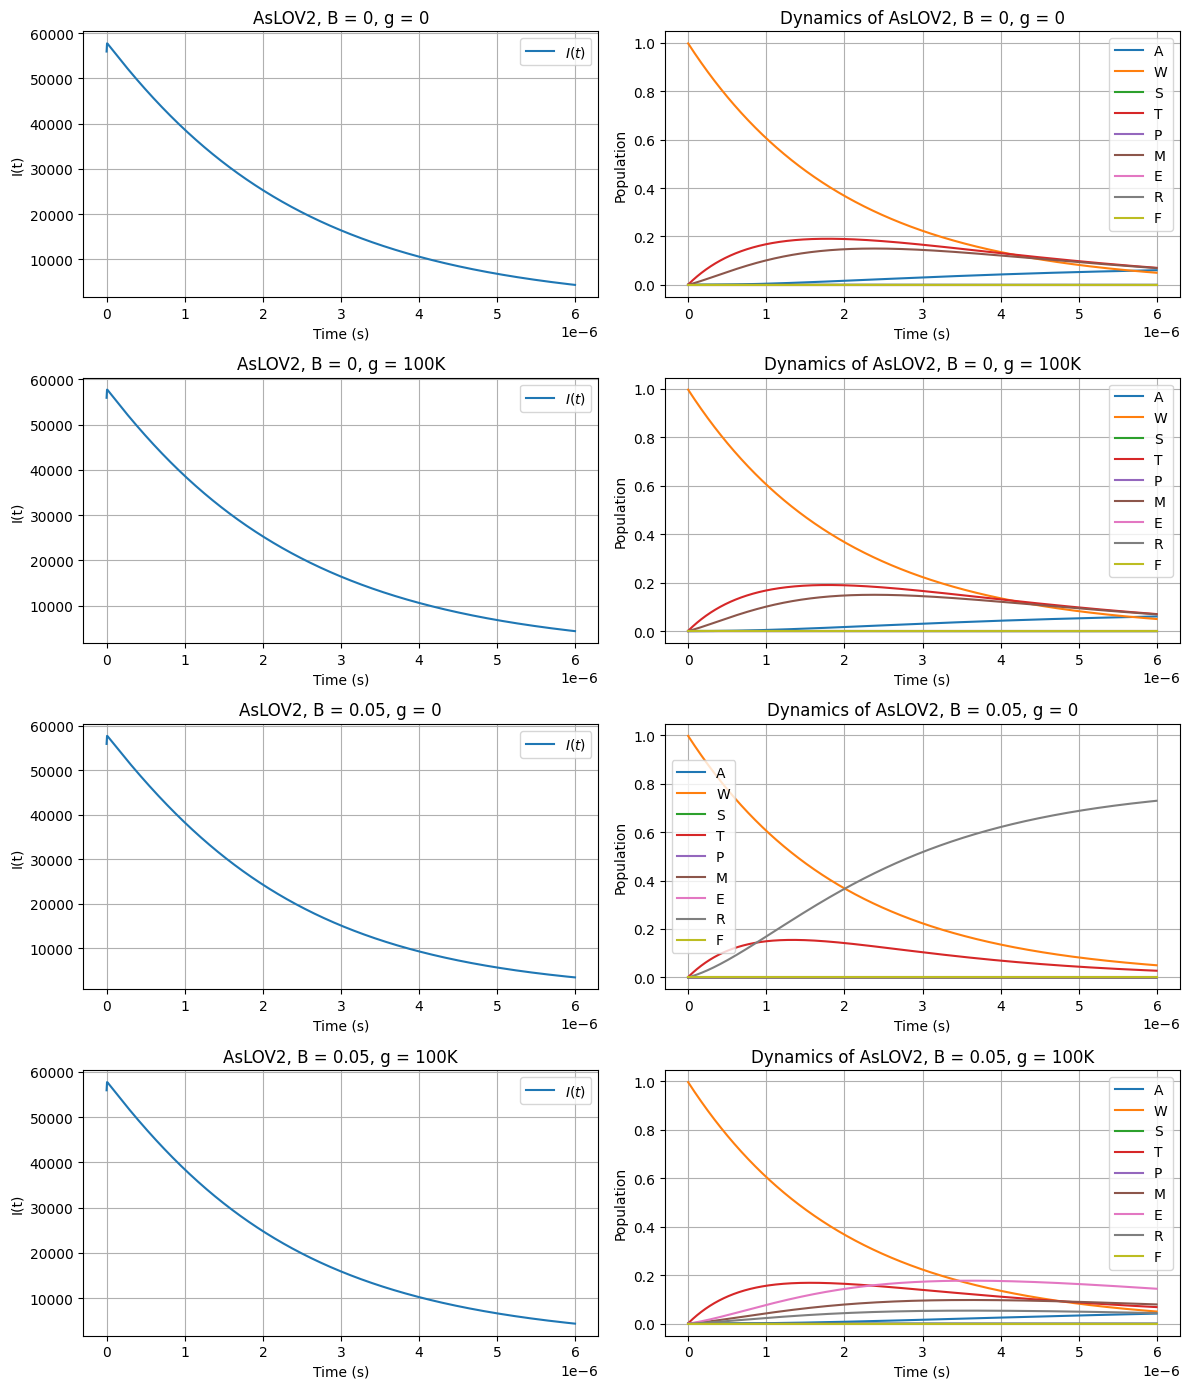

In [39]:
и

In [ ]:
# Определяем матрицу коэффициентов
def get_matrix(g_val, B, t):
    if B == 0:
        Q, P = 0, 0
    else:
        Q = 530 * g_val / (B)
        P = B * 7e10
    Matrix =  np.array([
        [-0.1, 0, 0, 0, 2.5e7, 9.2e5, 0, 0, 0],
        [0, -9e7, 6.5e7, 0, 0, 0.1, 0, 0, 0],
        [0, 9e7, -5.6e8, 1.8e5, 5e5, 0, 0, 0, 0],
        [0, 0, 3.6e8, -1.18e6, 0, 5e5, 0, 0, 0],
        [0, 0, 1e8, 0, -6.96e8, 3.4e5, 0, 0, 0],
        [0, 0, 0, 1e6, 6.7e8, -2e6 - Q - P, P, Q, 5e8],
        [0, 0, 0, 0, 0, Q, -2.4e5 - P, 0, 5e8],
        [0, 0, 0, 0, 0, P, 0, -2.4e5 - Q, 5e8],
        [0, 0, 0, 0, 0, 2.4e5, 2.4e5, 2.4e5, -15e8]
    ])
    if B == 0:
        Matrix[6] = [0, 0, 0, 0, 0, 0, 0, 0, 0]
        Matrix[7] = [0, 0, 0, 0, 0, 0, 0, 0, 0]
        Matrix[5, 6] = 0
        Matrix[5, 7] = 0
        Matrix[8, 6] = 0 
        Matrix[8, 7] = 0
        Matrix[8, 8] = -5e8
        
    return Matrix


Изменений нет


100%|██████████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 1003.01it/s]


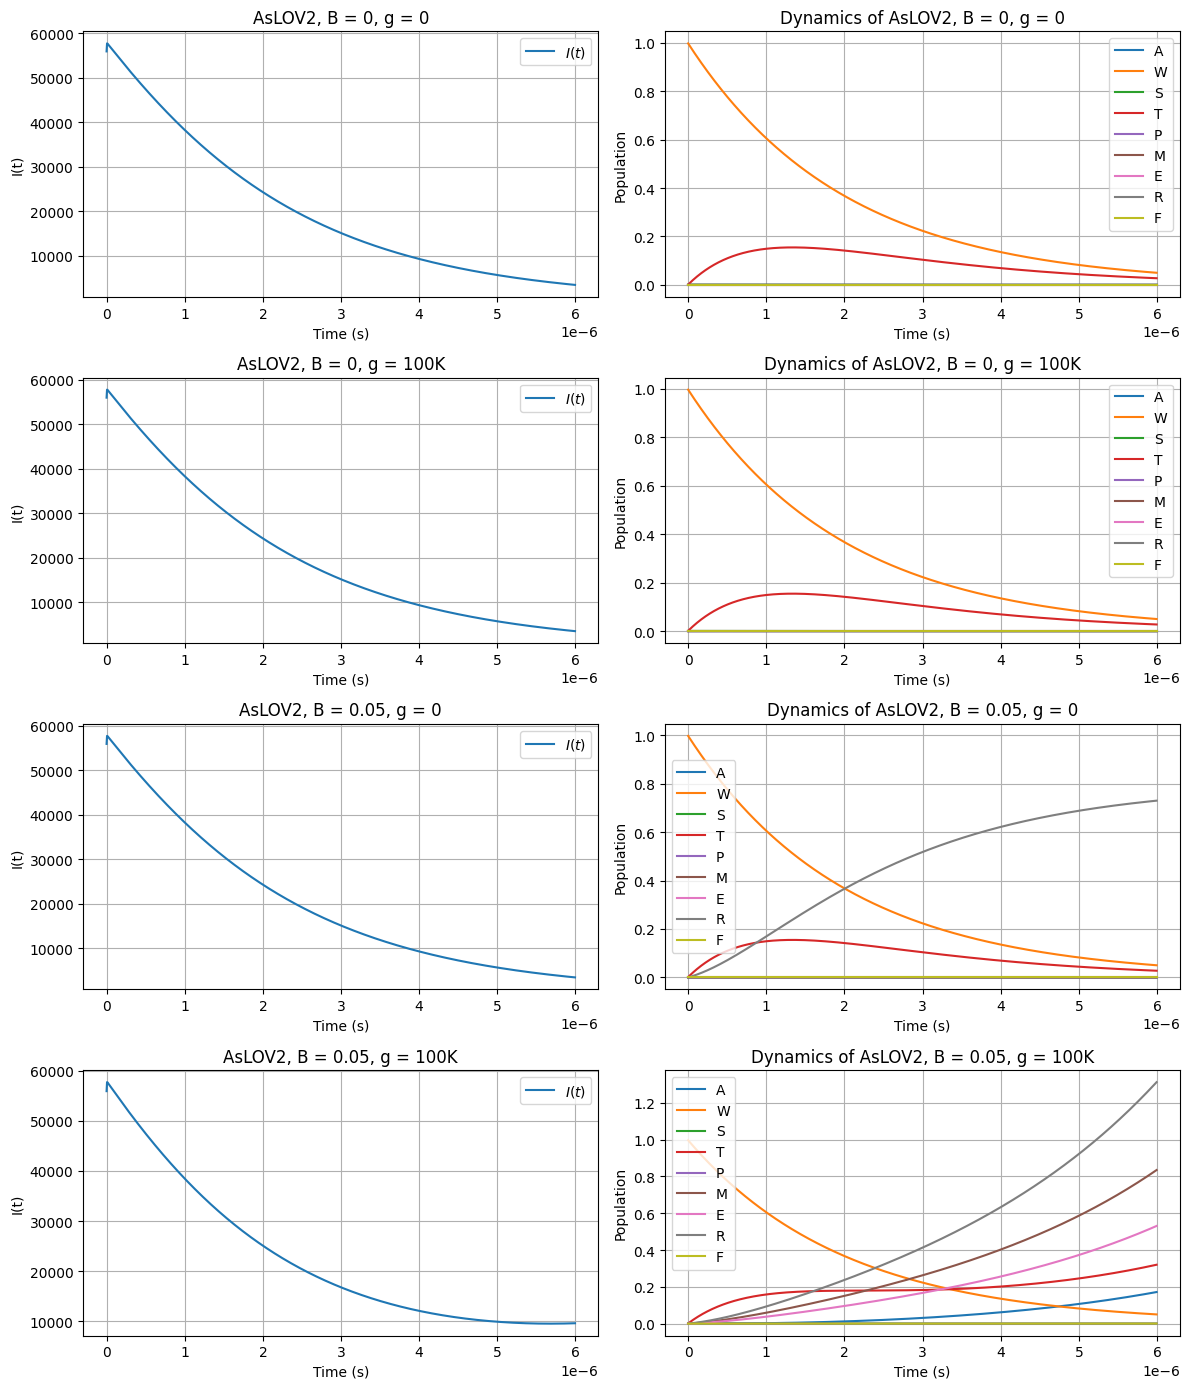

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
from tqdm import tqdm
import matplotlib.pyplot as plt

# Определяем матрицу коэффициентов
def get_matrix(g_val, B, t):
    if B == 0:
        Q = 0
    else:
        Q = 530 * g_val / (B)

    P = 1e10
    Matrix =  np.array([
        [-1, 0, 0, 0, 1e6, 9.2e4, 0, 0, 0],
        [0, -5e5, 1e6, 0, 0, 0.1, 0, 0, 0],
        [0, 5e5, -5.6e8, 1.8e5, 5e5, 0, 0, 0, 0],
        [0, 0, 3.6e8, -1.18e6, 0, 5e5, 0, 0, 0],
        [0, 0, 1e8, 0, -6.96e8, 3.4e5, 0, 0, 0],
        [0, 0, 0, 1e6, 6.7e8, -P - Q, P, Q, 5e8],
        [0, 0, 0, 0, 0, Q, -P, 0, 5e8],
        [0, 0, 0, 0, 0, P, 0, -2.4e5 - Q, 5e8],
        [0, 0, 0, 0, 0, 2.4e5, 2.4e5, 2.4e5, -15e8]
    ])
    if B == 0:
        Matrix[6] = [0, 0, 0, 0, 0, 0, 0, 0, 0]
        Matrix[7] = [0, 0, 0, 0, 0, 0, 0, 0, 0]
        Matrix[5, 6] = 0
        Matrix[5, 7] = 0
        Matrix[8, 6] = 0 
        Matrix[8, 7] = 0
        Matrix[8, 8] = -5e8
        
    return Matrix

# Начальные условия
y0 = np.zeros(9)
y0[1] = 1

# Диапазон времени
t_span = (0, 0.6e-5)
t_eval = np.linspace(*t_span, 1000)

# Нормализация
def normalize(y):
    total = np.sum(y)
    if total > 0:
        return y / total
    return y

# Решение с нормализацией
def solve_with_normalization(B, g_val):
    result = []
    current_y = y0
    for i in tqdm(range(1, len(t_eval))):
        dt = t_eval[i] - t_eval[i - 1]
        t_mid = (t_eval[i] + t_eval[i - 1]) / 2
        A = get_matrix(g_val, B, t_mid)
        sol = solve_ivp(lambda t, y: A @ y, (t_eval[i - 1], t_eval[i]), current_y, method='Radau')
        #current_y = normalize(sol.y[:, -1])
        current_y = sol.y[:, -1]
        result.append(current_y)

    return np.array(result).T

# Функция вычисления интенсивности и её возвращение для всех точек времени
def compute_fluorescence_intensity(B, g_val):
    normalized_y = solve_with_normalization(B, g_val)
    dv_dt = 6.5e7 * normalized_y[2]
    return dv_dt, normalized_y  # Возвращаем интенсивность для всех точек времени

dv_dt00, normalized_y00 = compute_fluorescence_intensity(B=0, g_val=0)
dv_dt005, normalized_y005 = compute_fluorescence_intensity(B=5e-2, g_val=0)
dv_dt_60K0, normalized_y06K0 = compute_fluorescence_intensity(B=0, g_val=6e5)
dv_dt_both, normalized_y_both = compute_fluorescence_intensity(B=5e-2, g_val=6e5)

# Метки для графиков
labels = ['A', 'W', 'S', 'T', 'P', 'M', 'E', 'R', 'F']
times = t_eval[:-1]

plt.figure(figsize=(12, 14))

# Построение графиков
for idx, (dv_dt, normalized_y, title_suffix) in enumerate([
    (dv_dt00, normalized_y00, "B = 0, g = 0"),
    (dv_dt_60K0, normalized_y06K0, "B = 0, g = 100K"),
    (dv_dt005, normalized_y005, "B = 0.05, g = 0"),
    (dv_dt_both, normalized_y_both, "B = 0.05, g = 100K")
]):
    plt.subplot(4, 2, 2 * idx + 1)
    plt.plot(times, dv_dt, label=r'$I(t)$')
    plt.xlabel('Time (s)')
    plt.ylabel('I(t)')
    plt.title(f'AsLOV2, {title_suffix}')
    plt.grid()
    plt.legend()

    plt.subplot(4, 2,  2*idx + 2 )
    for i in range(9):
        plt.plot(times, normalized_y[i], label=labels[i])
    plt.xlabel('Time (s)')
    plt.ylabel('Population')
    plt.title(f'Dynamics of AsLOV2, {title_suffix}')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

In [15]:
# Словарь для перевода кодонов в аминокислоты
genetic_code = {
    'ATA': 'Ile', 'ATC': 'Ile', 'ATT': 'Ile', 'ATG': 'Met', 'ACA': 'Thr', 'ACC': 'Thr', 'ACG': 'Thr', 'ACT': 'Thr',
    'AAC': 'Asn', 'AAT': 'Asn', 'AAA': 'Lys', 'AAG': 'Lys', 'AGC': 'Ser', 'AGT': 'Ser', 'AGA': 'Arg', 'AGG': 'Arg',
    'CTA': 'Leu', 'CTC': 'Leu', 'CTG': 'Leu', 'CTT': 'Leu', 'CCA': 'Pro', 'CCC': 'Pro', 'CCG': 'Pro', 'CCT': 'Pro',
    'CAC': 'His', 'CAT': 'His', 'CAA': 'Gln', 'CAG': 'Gln', 'CGA': 'Arg', 'CGC': 'Arg', 'CGG': 'Arg', 'CGT': 'Arg',
    'GTA': 'Val', 'GTC': 'Val', 'GTG': 'Val', 'GTT': 'Val', 'GCA': 'Ala', 'GCC': 'Ala', 'GCG': 'Ala', 'GCT': 'Ala',
    'GAC': 'Asp', 'GAT': 'Asp', 'GAA': 'Glu', 'GAG': 'Glu', 'GGA': 'Gly', 'GGC': 'Gly', 'GGG': 'Gly', 'GGT': 'Gly',
    'TCA': 'Ser', 'TCC': 'Ser', 'TCG': 'Ser', 'TCT': 'Ser', 'TTC': 'Phe', 'TTT': 'Phe', 'TTA': 'Leu', 'TTG': 'Leu',
    'TAC': 'Tyr', 'TAT': 'Tyr', 'TAA': 'STOP', 'TAG': 'STOP', 'TGC': 'Cys', 'TGT': 'Cys', 'TGA': 'STOP', 'TGG': 'Trp',
    'CTA': 'Leu', 'CTC': 'Leu', 'CTG': 'Leu', 'CTT': 'Leu', 'CCA': 'Pro', 'CCC': 'Pro', 'CCG': 'Pro', 'CCT': 'Pro'
}

# Функция для перевода нуклеотидной последовательности в аминокислотную
def translate_sequence(nucleotide_sequence):
    protein_sequence = []
    nucleotide_sequence = nucleotide_sequence.replace("\n", "").replace(" ", "").upper()  # Убираем пробелы и переносы строк и приводим к нижнему регистру
    # Разбиваем последовательность на кодоны по 3 нуклеотида
    for i in range(0, len(nucleotide_sequence), 3):
        codon = nucleotide_sequence[i:i+3]
        if len(codon) == 3:  # Проверяем, чтобы кодон был полного размера
            protein_sequence.append(genetic_code.get(codon, '?'))  # Заменяем на аминокислоту, если есть в коде
    return protein_sequence

# Функция для анализа изменений
def analyze_mutation(original_seq, mutated_seq):
    original_protein = translate_sequence(original_seq)
    mutated_protein = translate_sequence(mutated_seq)
    
    mutations = []
    
    for i in range(len(original_protein)):
        if original_protein[i] != mutated_protein[i]:
            mutations.append((i, original_protein[i], mutated_protein[i]))
    
    return mutations

# Чтение файлов и извлечение последовательности
def read_sequence_from_file(file_path):
    with open(file_path, 'r') as file:
        return file.read()

# Пример чтения данных из файлов
original_sequence = read_sequence_from_file("aslov.txt")
mutated_sequence = read_sequence_from_file("maglov.txt")


In [1]:
original = list("MLATTLERIEKNFTITDPRLPDNPIIFASDSFLQLTEYSREEILGRNARFLQGPETDRATVRKIRDAIDNQTEVTVQLINYTKSGKKFWNLFHLQPMRDQKGDVQYFIGVQLDGTEHVRDAAEREGVMLIKKTAENIDEAAKEL")
mutant = list("MLATTLERIEKNFVITDPRLPDNPIIFASDSFLQLTEYSREEILGRNPRFLQGPETDRATVRKIRDAIDNQTEVTVQLINYTKSGKKFWNLFHVQPMRDQKGDVQYFIGVKLDGTEHVRDAAEREKVMLIKKTAENIMEAAKEL")

mutations = []

for i in range(len(original)):
    if original[i] != mutant[i]:
        mutations.append((i, original[i], mutant[i]))
print(mutations)
print(len(mutant))

[(13, 'T', 'V'), (47, 'A', 'P'), (93, 'L', 'V'), (110, 'Q', 'K'), (125, 'G', 'K'), (137, 'D', 'M')]
144


In [32]:
print(original[47])

A


In [1]:
PAS = "MDFSFIKALQTAQQNFVVTDPSLPDNPIVYASQGFLNLTGYSLDQILGRNCRFLQGPETDPKAVERIRKAIEQGNDMSVCLLNYRVDGTTFWNQFFIAALRDAGGNVTNFVGVQCKVSDQYAATVTKQQ"
print(PAS.index("C"))

50


100%|███████████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 1319.67it/s]


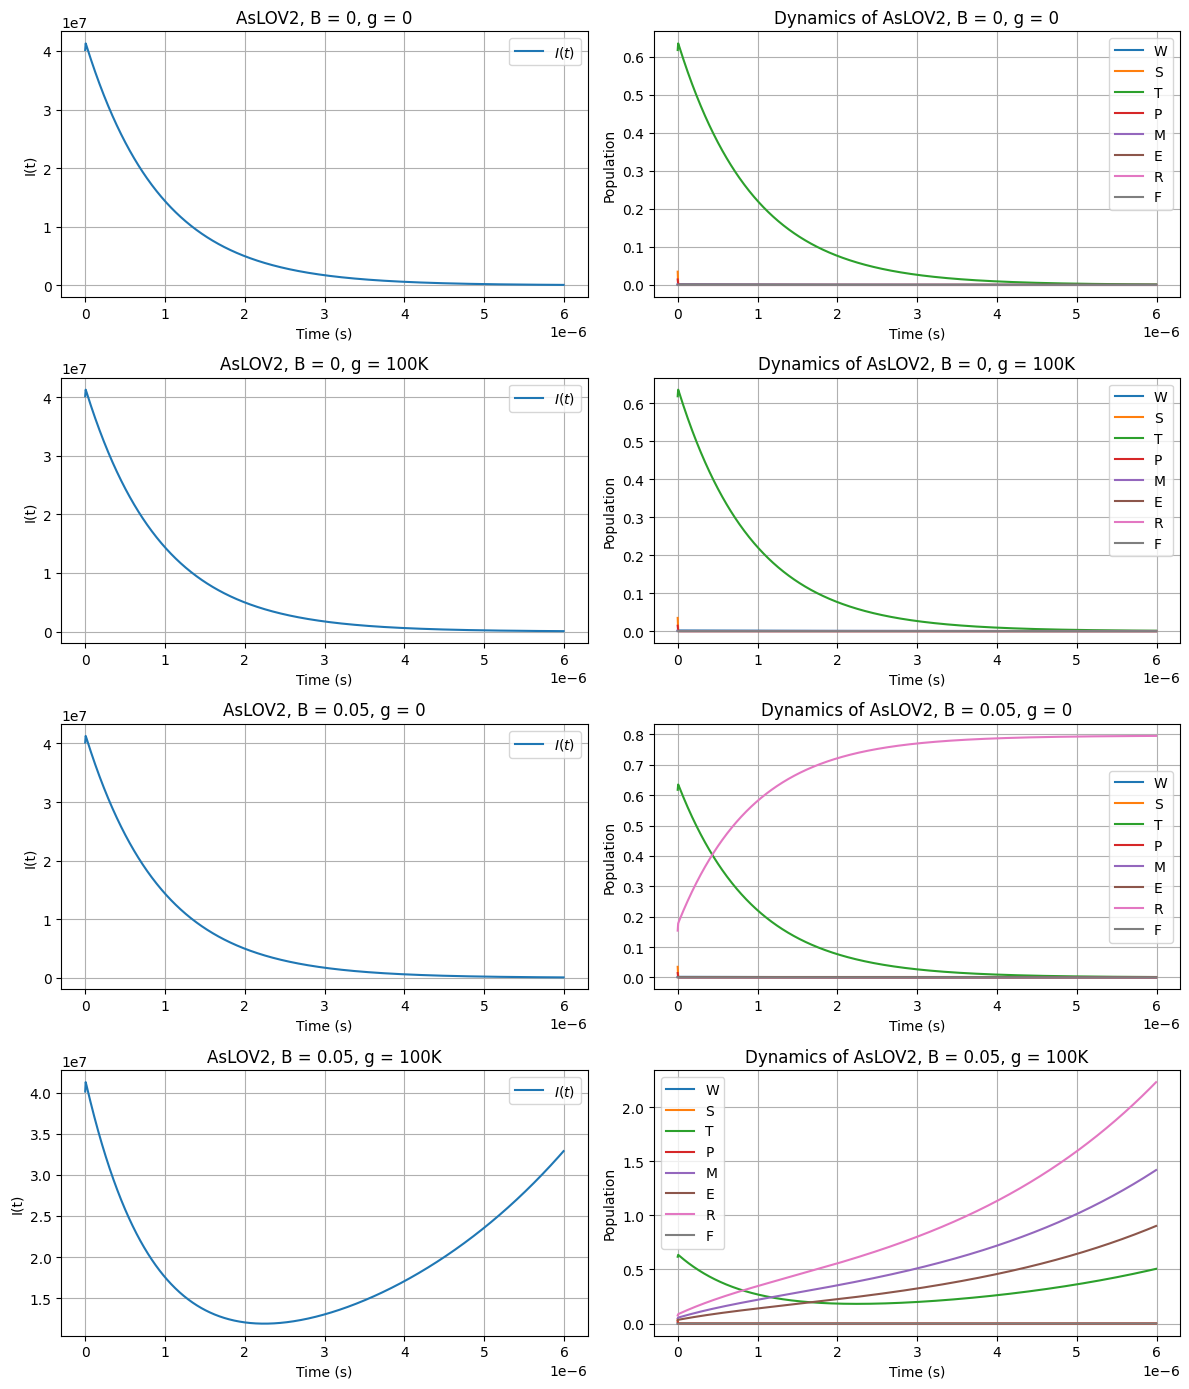

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
from tqdm import tqdm
import matplotlib.pyplot as plt

# Определяем матрицу коэффициентов
def get_matrix(g_val, B, t):
    if B == 0:
        Q = 0
    else:
        Q = 530 * g_val / (B)

    P = 1e10
    Matrix =  np.array([
        [-5e5, 1e6, 0, 0, 0.1, 0, 0, 0],
        [5e5, -5.6e8, 1.8e5, 5e5, 0, 0, 0, 0],
        [0, 3.6e8, -1.18e6, 0, 5e5, 0, 0, 0],
        [0, 1e8, 0, -6.96e8, 3.4e5, 0, 0, 0],
        [0, 0, 1e6, 6.7e8, -P - Q, P, Q, 5e8],
        [0, 0, 0, 0, Q, -P, 0, 5e8],
        [0, 0, 0, 0, P, 0, -2.4e5 - Q, 5e8],
        [0, 0, 0, 0, 2.4e5, 2.4e5, 2.4e5, -15e8]
    ])
    if B == 0:
        Matrix[5] = [0, 0, 0, 0, 0, 0, 0, 0]
        Matrix[6] = [0, 0, 0, 0, 0, 0, 0, 0]
        Matrix[4, 5] = 0
        Matrix[4, 6] = 0
        Matrix[7, 5] = 0 
        Matrix[7, 6] = 0
        Matrix[7, 7] = -5e8
        
    return Matrix

# Начальные условия
y0 = np.zeros(8)
y0[1] = 1

# Диапазон времени
t_span = (0, 0.6e-5)
t_eval = np.linspace(*t_span, 1000)

# Нормализация
def normalize(y):
    total = np.sum(y)
    if total > 0:
        return y / total
    return y

# Решение с нормализацией
def solve_with_normalization(B, g_val):
    result = []
    current_y = y0
    for i in tqdm(range(1, len(t_eval))):
        dt = t_eval[i] - t_eval[i - 1]
        t_mid = (t_eval[i] + t_eval[i - 1]) / 2
        A = get_matrix(g_val, B, t_mid)
        sol = solve_ivp(lambda t, y: A @ y, (t_eval[i - 1], t_eval[i]), current_y, method='Radau')
        #current_y = normalize(sol.y[:, -1])
        current_y = sol.y[:, -1]
        result.append(current_y)

    return np.array(result).T

# Функция вычисления интенсивности и её возвращение для всех точек времени
def compute_fluorescence_intensity(B, g_val):
    normalized_y = solve_with_normalization(B, g_val)
    dv_dt = 6.5e7 * normalized_y[2]
    return dv_dt, normalized_y  # Возвращаем интенсивность для всех точек времени

dv_dt00, normalized_y00 = compute_fluorescence_intensity(B=0, g_val=0)
dv_dt005, normalized_y005 = compute_fluorescence_intensity(B=5e-2, g_val=0)
dv_dt_60K0, normalized_y06K0 = compute_fluorescence_intensity(B=0, g_val=6e5)
dv_dt_both, normalized_y_both = compute_fluorescence_intensity(B=5e-2, g_val=6e5)

# Метки для графиков
labels = ['W', 'S', 'T', 'P', 'M', 'E', 'R', 'F']
times = t_eval[:-1]

plt.figure(figsize=(12, 14))

# Построение графиков
for idx, (dv_dt, normalized_y, title_suffix) in enumerate([
    (dv_dt00, normalized_y00, "B = 0, g = 0"),
    (dv_dt_60K0, normalized_y06K0, "B = 0, g = 100K"),
    (dv_dt005, normalized_y005, "B = 0.05, g = 0"),
    (dv_dt_both, normalized_y_both, "B = 0.05, g = 100K")
]):
    plt.subplot(4, 2, 2 * idx + 1)
    plt.plot(times, dv_dt, label=r'$I(t)$')
    plt.xlabel('Time (s)')
    plt.ylabel('I(t)')
    plt.title(f'AsLOV2, {title_suffix}')
    plt.grid()
    plt.legend()

    plt.subplot(4, 2,  2*idx + 2 )
    for i in range(8):
        plt.plot(times, normalized_y[i], label=labels[i])
    plt.xlabel('Time (s)')
    plt.ylabel('Population')
    plt.title(f'Dynamics of AsLOV2, {title_suffix}')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()